# Car_Price_Prediction_With_Machine_Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<Axes: xlabel='Driven_kms'>

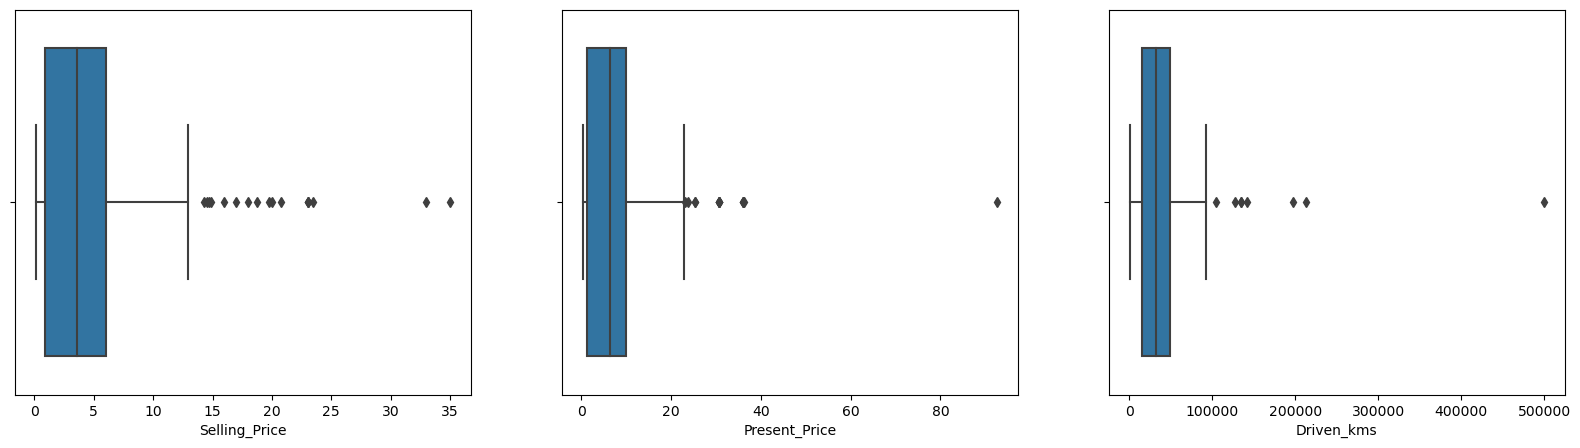

In [6]:
fig, ax = plt.subplots(1, 3,figsize=(20, 5) )
sns.boxplot(ax = ax[0], x = df['Selling_Price'])
sns.boxplot(ax = ax[1], x = df['Present_Price'])
sns.boxplot(ax = ax[2], x = df['Driven_kms'])

Selling_Price
2.480979484005291


C:\Users\Mann\AppData\Local\Temp\ipykernel_18112\4177700323.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


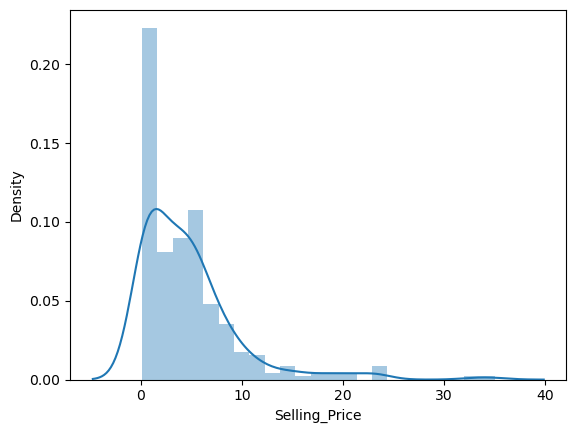

Present_Price
4.065021455029187


C:\Users\Mann\AppData\Local\Temp\ipykernel_18112\4177700323.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


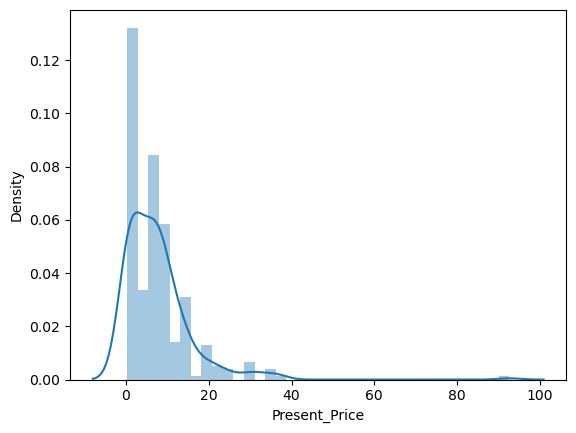

C:\Users\Mann\AppData\Local\Temp\ipykernel_18112\4177700323.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


Driven_kms
6.403895025283172


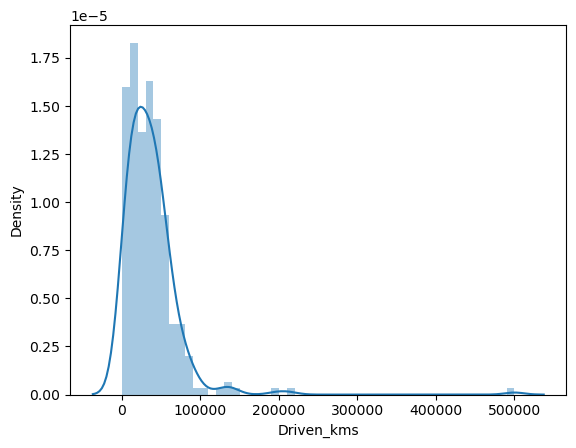

In [7]:
from scipy.stats import skew
df_num= df[['Selling_Price', 'Present_Price', 'Driven_kms']]

for col in df_num: 
    print(col)
    print(skew(df_num[col]))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

In [8]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [9]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [10]:
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

In [11]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=99)

In [14]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train,Y_train)

LinearRegression()

In [15]:
train_prediction = LR_model.predict(X_train)

In [16]:
from sklearn import metrics
error_score = metrics.r2_score(Y_train, train_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8708567566461765


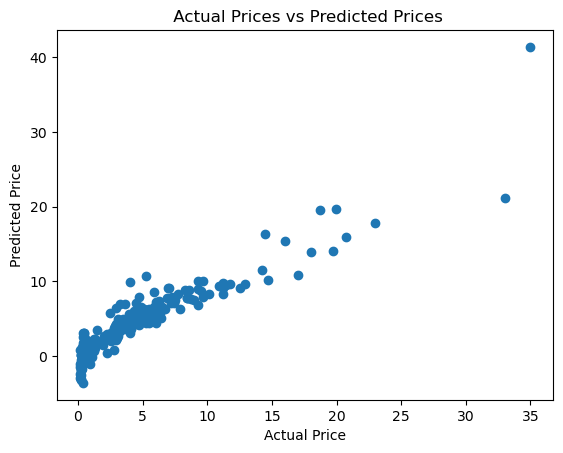

In [17]:
plt.scatter(Y_train, train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [18]:
test_prediction = LR_model.predict(X_test)

error_score = metrics.r2_score(Y_test, test_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8993506045436575


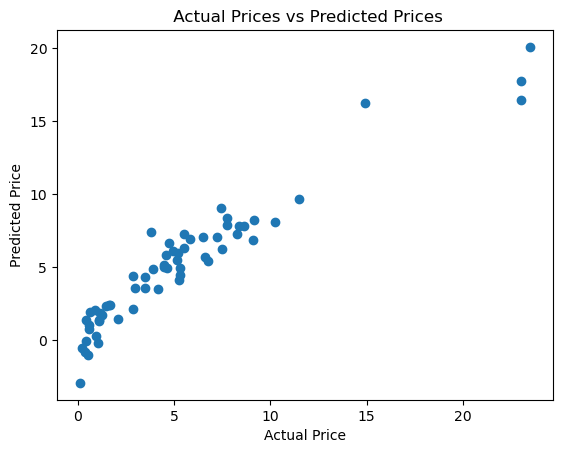

In [19]:
plt.scatter(Y_test, test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [20]:
from sklearn.metrics import r2_score
print('Testing data accuracy:',r2_score(Y_test, test_prediction))
print('Training data accuracy:',r2_score(Y_train, train_prediction))

Testing data accuracy: 0.8993506045436575
Training data accuracy: 0.8708567566461765


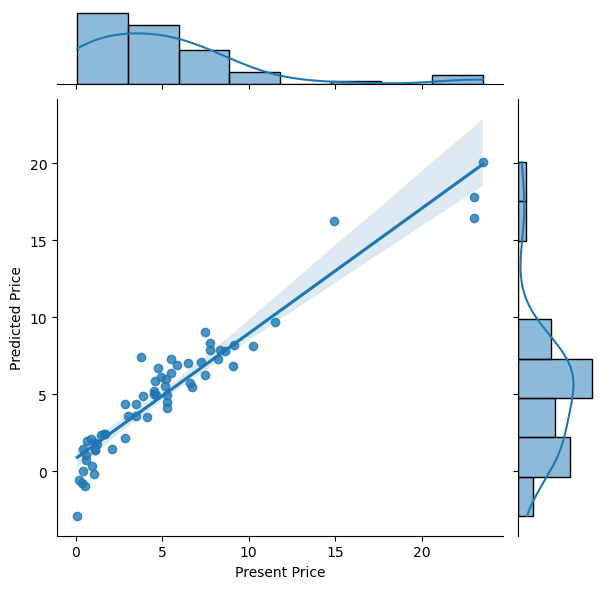

In [21]:
sns.jointplot(x = Y_test, y = test_prediction, kind = 'reg')
plt.xlabel("Present Price")
plt.ylabel("Predicted Price")
plt.show()